In [ ]:
# カスタムシミュレーション例
# 以下の値を変更して実行してください

custom_target_mp = 90000000  # 目標MP額（円）例: 9,000万円
custom_target_month = 3      # 対象月（1-12）例: 3月

# シミュレーション実行
custom_result = simulator.simulate_target(custom_target_mp, custom_target_month)
simulator.show_simulation_result(custom_result)

### 8.4 カスタム目標MPシミュレーション

任意の目標MP額と対象月を指定してシミュレーションを実行できます。

In [ ]:
# 積み上げ棒グラフで可視化
fig, ax = plt.subplots(figsize=(14, 7))

months = monthly_sim_df['対象月'].values
kakutei = monthly_sim_df['確定MP（万円）'].values
amp = monthly_sim_df['AMP（万円）'].values
bmp = monthly_sim_df['BMP（万円）'].values
cmp = monthly_sim_df['CMP（万円）'].values
dmp = monthly_sim_df['DMP（万円）'].values

# 積み上げ棒グラフを作成
width = 0.6
x = np.arange(len(months))

p1 = ax.bar(x, kakutei, width, label='確定MP', color='#2E86AB')
p2 = ax.bar(x, amp, width, bottom=kakutei, label='AMP', color='#A23B72')
p3 = ax.bar(x, bmp, width, bottom=kakutei+amp, label='BMP', color='#F18F01')
p4 = ax.bar(x, cmp, width, bottom=kakutei+amp+bmp, label='CMP', color='#C73E1D')
p5 = ax.bar(x, dmp, width, bottom=kakutei+amp+bmp+cmp, label='DMP', color='#6A994E')

# 目標ラインを追加
ax.axhline(y=target_mp/10000, color='red', linestyle='--', linewidth=2, label=f'目標MP: {target_mp/10000:,.0f}万円')

ax.set_xlabel('対象月', fontsize=12)
ax.set_ylabel('必要なMP額（万円）', fontsize=12)
ax.set_title(f'月別MP目標達成シミュレーション（目標: {target_mp/10000:,.0f}万円）', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend(loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### 8.3 必要なMP種別の月別可視化

月別に必要な各MP種別を積み上げ棒グラフで可視化します。

In [ ]:
# 全12ヶ月分のシミュレーション
target_mp = 80000000  # 8,000万円
mn = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_simulation_results = []

for target_month in range(1, 13):
    result = simulator.simulate_target(target_mp, target_month)
    monthly_simulation_results.append({
        '対象月': mn[target_month],
        '目標MP（万円）': result['target_mp'] / 10000,
        '転換率(%)': result['conversion_rate'],
        '確定MP（万円）': result['required_kakutei'] / 10000,
        'AMP（万円）': result['required_amp'] / 10000,
        'BMP（万円）': result['required_bmp'] / 10000,
        'CMP（万円）': result['required_cmp'] / 10000,
        'DMP（万円）': result['required_dmp'] / 10000
    })

# DataFrameに変換して表示
monthly_sim_df = pd.DataFrame(monthly_simulation_results)
print('\n' + '='*100)
print(f'月別目標MP達成シミュレーション（目標: {target_mp/10000:,.0f}万円）')
print('='*100)
display(monthly_sim_df)

### 8.2 月別目標MPシミュレーション一覧

各月の目標MP 8,000万円を達成するために必要な各MP種別を月別に一覧表示します。

In [ ]:
# 例1: 来月（2月）の目標MP 8,000万円を達成するシミュレーション
target_mp = 80000000  # 8,000万円
target_month = 2      # 2月

result = simulator.simulate_target(target_mp, target_month)
simulator.show_simulation_result(result)

### 8.1 使用例：来月の目標MPを達成するシミュレーション

最新データ（2026年1月末時点）を使って、来月（2月）の目標MPを達成するために必要な各MP種別を算出します。

### 予測モデルの仕組みをわかりやすく説明します！

#### どんなことを予測するの？
このモデルは、「来月の限界利益がどのくらいになりそうか」を予測するものです。

#### どうやって予測するの？

1.  **過去のデータを見るよ！**
    *   まず、これまでの限界利益データ（「MP」という名前だよ）をたくさん集めて、どんな傾向があるかを見ます。
    *   特に、「毎月どのくらいの限界利益があるか」や「来月どれくらい増えそうか」のヒントを探すんだ。

2.  **２つの限界利益を足し算するよ！**
    来月の限界利益を予測するとき、大きく分けて２つの部分に分けて考えます。

    *   **「もう決まっている限界利益（Confirmed）」**:
        これは、「先月までに、もう来月の限界利益として確定しているもの」と「来月に増えることがほぼ決まっているもの」を合わせた限界利益です。これはほぼ確実に手に入る限界利益だね！
        （具体的には「Kakutei_MP」と「AMP」という部分を足したものだよ。）

    *   **「これから増えそうな限界利益（Additional）」**:
        これは、「まだ確定していないけど、これまでの経験から考えると、これくらいは増えそうだね」という限界利益です。
        この部分を予測するために、特別な計算を使います。特に「BCD」という種類の限界利益（「BMP」「CMP」「DMP」という３つの種類の限界利益を足したものだよ）が、どのくらい「これから増えそうな限界利益」に変わるかを過去のデータから学ぶんだ。
        （これは「転換率」という考え方を使っているよ。例えば、「100個あったら、そのうち50個は来月利益になるだろう」といった予測をするイメージです。）

3.  **合計するよ！**
    最後に、「もう決まっている限界利益」と「これから増えそうな限界利益」を足し合わせると、来月の限界利益の予測が出てきます。

#### まとめると...

このモデルは、これまでの限界利益データを使って、**「すでに決まっている限界利益」**と**「過去の傾向から見て、これから増えそうな限界利益」**を別々に計算し、それらを合計することで、**「来月の限界利益がどのくらいになりそうか」**を教えてくれる賢い予測屋さんなんです！

### 予測モデルの仕組みをもう少し詳しく説明します！

先ほどは、来月の限界利益を「もう決まっている限界利益」と「これから増えそうな限界利益」の2つに分けて考えると説明しましたね。

「これから増えそうな限界利益（Additional）」を予測するために、このモデルでは主に2つの方法を使っています。

#### 1. 「ランダムフォレスト」という賢い予測屋さん

*   **ランダムフォレストって何？**
    これは、たくさんの小さな「予測の木」を集めて、みんなで相談して答えを出すようなものです。例えば、「この状況なら限界利益がこれくらい増えるんじゃない？」という予測を、それぞれが考えて、最後に一番良い答えを決めるイメージです。

*   **どうやって使うの？**
    過去のデータ（特に「BMP」「CMP」「DMP」といった種類の限界利益や、それが何月に起こったか）をこのたくさんの「予測の木」たちに教えてあげます。すると、「BMP」がいくらで「CMP」がいくらで「DMP」がいくらで、何月の予測だったら、どれくらい「これから増えそうな限界利益」になるかを賢く予測してくれるんです。

#### 2. 「月別の転換率」で予測

*   **転換率って何？**
    これは、「これくらいの限界利益（BCD）があったら、過去の経験から見て、だいたい何パーセントくらいが来月実際に限界利益になるだろう？」という割合のことです。

*   **どうやって使うの？**
    例えば、「1月だったら、BCDの限界利益があったら過去のデータではだいたい70%が『これから増えそうな限界利益』になっていたな」というように、月ごとにその割合（転換率）を計算しておきます。
    そして、新しい予測をするときには、その月の転換率を使って「これくらいは増えるだろう」と予測します。

#### 最終的な予測

このモデルでは、この「ランダムフォレスト」の予測と「月別の転換率」を使った予測を、良いバランスで組み合わせています。こうすることで、片方だけの予測よりも、もっと正確な「これから増えそうな限界利益」を出すことができるんですよ。

これに「もう決まっている限界利益」を足し合わせることで、来月の限界利益を最終的に予測しています。

# MP Monthly Prediction Model
## 月別係数を用いた翌月MP予測モデル

## 1. ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print('Libraries loaded!')

Libraries loaded!


## 2. データの読み込み

In [2]:
try:
    from google.colab import files
    print('Upload CSV file:')
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
except:
    filename = 'progress_data.csv'
    print(f'Using: {filename}')

Upload CSV file:


Saving 進捗データ3._2026020317540815025.csv to 進捗データ3._2026020317540815025 (1).csv


In [3]:
try:
    df = pd.read_csv(filename, encoding='utf-8-sig')
except:
    df = pd.read_csv(filename, encoding='shift_jis')

print(f'Shape: {df.shape}')
print(f'Columns: {df.columns.tolist()}')
df.head()

Shape: (2132, 7)
Columns: ['行ラベル', '合計 / MP', '合計 / 次月確定MP', '合計 / 次月AMP', '合計 / 次月BMP', '合計 / 次月CMP', '合計 / 次月DMP']


,行ラベル,合計 / MP,合計 / 次月確定MP,合計 / 次月AMP,合計 / 次月BMP,合計 / 次月CMP,合計 / 次月DMP
0,2020/04/01,52612321,0,15815626,1787889,2610055,58101088
1,2020/04/02,56827598,0,16514617,2656829,3009163,54178242
2,2020/04/03,58726803,0,16344677,3487701,3368643,50733450
3,2020/04/04,58726803,0,16344677,3487701,3368643,50733450
4,2020/04/05,59218260,0,16523619,3487701,4072319,50733450


## 3. データ前処理

In [4]:
# 元のカラム名を保存
original_columns = df.columns.tolist()
print(f'Original columns: {original_columns}')

# 日付処理
# '総計'のような非日付エントリをNaTに変換し、エラーを無視するように修正
df['date'] = pd.to_datetime(df.iloc[:, 0], errors='coerce')
# NaT（無効な日付）を含む行を削除
df.dropna(subset=['date'], inplace=True)

df['year_month'] = df['date'].dt.to_period('M')

# 月末データを抽出
month_end_df = df.groupby('year_month').last().reset_index()

print(f'\nAfter groupby columns: {month_end_df.columns.tolist()}')

Original columns: ['行ラベル', '合計 / MP', '合計 / 次月確定MP', '合計 / 次月AMP', '合計 / 次月BMP', '合計 / 次月CMP', '合計 / 次月DMP']

After groupby columns: ['year_month', '行ラベル', '合計 / MP', '合計 / 次月確定MP', '合計 / 次月AMP', '合計 / 次月BMP', '合計 / 次月CMP', '合計 / 次月DMP', 'date']


In [5]:
# 元のカラム名でリネーム（groupby後も元のカラム名は保持される）
col_mapping = {
    original_columns[1]: 'MP',
    original_columns[2]: 'Kakutei_MP',
    original_columns[3]: 'AMP',
    original_columns[4]: 'BMP',
    original_columns[5]: 'CMP',
    original_columns[6]: 'DMP'
}
print(f'Mapping: {col_mapping}')

month_end_df = month_end_df.rename(columns=col_mapping)

# 数値変換
for col in ['MP', 'Kakutei_MP', 'AMP', 'BMP', 'CMP', 'DMP']:
    month_end_df[col] = pd.to_numeric(month_end_df[col], errors='coerce')

# 翌月MP
month_end_df['Next_Month_MP'] = month_end_df['MP'].shift(-1)

# 月情報
month_end_df['source_month'] = month_end_df['year_month'].dt.month
month_end_df['target_month'] = (month_end_df['source_month'] % 12) + 1

print(f'\nData points: {len(month_end_df)}')
print(f'\nMP column check:')
print(month_end_df[['year_month', 'MP', 'Next_Month_MP']].head())

Mapping: {'合計 / MP': 'MP', '合計 / 次月確定MP': 'Kakutei_MP', '合計 / 次月AMP': 'AMP', '合計 / 次月BMP': 'BMP', '合計 / 次月CMP': 'CMP', '合計 / 次月DMP': 'DMP'}

Data points: 70

MP column check:
  year_month        MP  Next_Month_MP
0    2020-04  74015901     68362895.0
1    2020-05  68362895     76016812.0
2    2020-06  76016812     75108961.0
3    2020-07  75108961     67495135.0
4    2020-08  67495135     72311232.0


In [6]:
# 訓練データ作成
train_data = month_end_df[month_end_df['Next_Month_MP'].notna()].copy()
print(f'Training data: {len(train_data)} months')

if len(train_data) > 0:
    train_data['Confirmed'] = train_data['Kakutei_MP'] + train_data['AMP']
    train_data['Additional'] = train_data['Next_Month_MP'] - train_data['Confirmed']
    train_data['BCD_Total'] = train_data['BMP'] + train_data['CMP'] + train_data['DMP']
    train_data['Conversion_Rate'] = train_data['Additional'] / train_data['BCD_Total'] * 100
    print('Calculations complete!')
    print(train_data[['year_month', 'MP', 'Confirmed', 'BCD_Total']].head())
else:
    print('ERROR: No training data!')

Training data: 69 months
Calculations complete!
  year_month        MP  Confirmed  BCD_Total
0    2020-04  74015901   47293247   32622155
1    2020-05  68362895   52354922   30298738
2    2020-06  76016812   49951844   29305109
3    2020-07  75108961   46729956   31021450
4    2020-08  67495135   51695361   33570016


## 4. 月別転換率

In [7]:
monthly_stats = train_data.groupby('target_month').agg({
    'Conversion_Rate': ['mean', 'std', 'count']
}).round(1)
monthly_stats.columns = ['Avg_Rate', 'Std', 'Count']

print('Monthly BCD Conversion Rate')
print('='*50)
month_names = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for m in range(1, 13):
    if m in monthly_stats.index:
        r = monthly_stats.loc[m]
        print(f'{m:2d} ({month_names[m]}): {r["Avg_Rate"]:5.1f}% (n={int(r["Count"])})')
monthly_stats

Monthly BCD Conversion Rate
 1 (Jan):  76.8% (n=6)
 2 (Feb):  62.2% (n=5)
 3 (Mar):  87.5% (n=5)
 4 (Apr):  74.9% (n=5)
 5 (May):  78.2% (n=6)
 6 (Jun):  75.5% (n=6)
 7 (Jul):  80.3% (n=6)
 8 (Aug):  64.9% (n=6)
 9 (Sep):  66.4% (n=6)
10 (Oct):  83.1% (n=6)
11 (Nov):  74.0% (n=6)
12 (Dec):  79.4% (n=6)


,Avg_Rate,Std,Count
target_month,,,
1,76.8,12.8,6
2,62.2,7.3,5
3,87.5,2.4,5
4,74.9,11.7,5
5,78.2,14.5,6
6,75.5,8.0,6
7,80.3,19.7,6
8,64.9,15.2,6
9,66.4,7.8,6


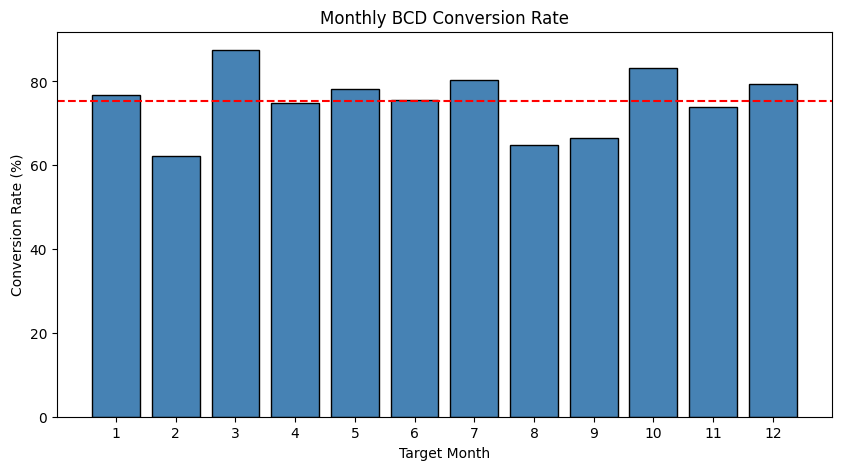

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
months = list(range(1, 13))
rates = [monthly_stats.loc[m, 'Avg_Rate'] if m in monthly_stats.index else 0 for m in months]
ax.bar(months, rates, color='steelblue', edgecolor='black')
ax.axhline(train_data['Conversion_Rate'].mean(), color='red', linestyle='--')
ax.set_xlabel('Target Month')
ax.set_ylabel('Conversion Rate (%)')
ax.set_title('Monthly BCD Conversion Rate')
ax.set_xticks(months)
plt.show()

## 5. モデル構築

In [9]:
class MonthlyMPPredictor:
    def __init__(self):
        self.model = None
        self.monthly_rates = {}
        self.overall_avg_rate = None

    def train(self, data):
        for m in range(1, 13):
            sub = data[data['target_month'] == m]
            if len(sub) > 0:
                self.monthly_rates[m] = sub['Conversion_Rate'].mean()
        self.overall_avg_rate = data['Conversion_Rate'].mean()

        X = data[['BMP', 'CMP', 'DMP', 'target_month']]
        y = data['Additional']
        self.model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
        self.model.fit(X, y)

        pred = data['Confirmed'] + self.model.predict(X)
        return {
            'mae': mean_absolute_error(data['Next_Month_MP'], pred),
            'r2': r2_score(data['Next_Month_MP'], pred)
        }

    def predict(self, kakutei, amp, bmp, cmp, dmp, source_month):
        target = (source_month % 12) + 1
        confirmed = kakutei + amp
        bcd = bmp + cmp + dmp

        add_rf = self.model.predict([[bmp, cmp, dmp, target]])[0]
        rate = self.monthly_rates.get(target, self.overall_avg_rate) / 100
        add_rate = bcd * rate
        additional = add_rf * 0.7 + add_rate * 0.3

        return {
            'source': source_month, 'target': target,
            'confirmed': confirmed, 'additional': additional,
            'forecast': confirmed + additional,
            'bcd': bcd, 'rate': rate * 100
        }

print('MonthlyMPPredictor defined!')

MonthlyMPPredictor defined!


In [10]:
predictor = MonthlyMPPredictor()
metrics = predictor.train(train_data)

print('Model Trained!')
print(f'MAE: {metrics["mae"]/10000:,.0f} (10K JPY)')
print(f'R2:  {metrics["r2"]:.3f}')

Model Trained!
MAE: 204 (10K JPY)
R2:  0.964


## 6. 予測実行

In [11]:
def show_prediction(p):
    mn = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    print('='*50)
    print(f'{mn[p["source"]]}-End -> {mn[p["target"]]} Forecast')
    print('='*50)
    print(f'Confirmed:  {p["confirmed"]/10000:>10,.0f} (10K)')
    print(f'Additional: {p["additional"]/10000:>10,.0f} (10K)')
    print(f'FORECAST:   {p["forecast"]/10000:>10,.0f} (10K)')
    print(f'Rate: {p["rate"]:.1f}%')
    print('='*50)

In [12]:
# 最新データで予測
latest = month_end_df.iloc[-1]
print(f'Latest: {latest["year_month"]}')

p = predictor.predict(
    latest['Kakutei_MP'], latest['AMP'],
    latest['BMP'], latest['CMP'], latest['DMP'],
    source_month=int(latest['source_month'])
)
show_prediction(p)

Latest: 2026-01
Jan-End -> Feb Forecast
Confirmed:       5,298 (10K)
Additional:      2,156 (10K)
FORECAST:        7,454 (10K)
Rate: 62.2%


In [18]:
# カスタム予測 (source_month: 1=Jan末, 4=Apr末, 12=Dec末)
p = predictor.predict(
    kakutei=609289, amp=47905097,
    bmp=5236622, cmp=3481478, dmp=18589534,
    source_month=1  # 1月末 -> 2月予測
)
show_prediction(p)

Jan-End -> Feb Forecast
Confirmed:       4,851 (10K)
Additional:      1,992 (10K)
FORECAST:        6,843 (10K)
Rate: 62.2%


### 月別シミュレーション結果の可視化

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 最新データを使用して、全12ヶ月分のシミュレーションを実行
latest = month_end_df.iloc[-1]
mn = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

simulation_results = []

for sm in range(1, 13):
    p = predictor.predict(
        latest['Kakutei_MP'], latest['AMP'],
        latest['BMP'], latest['CMP'], latest['DMP'],
        source_month=sm
    )
    simulation_results.append({
        'source_month': sm,
        'target_month': p['target'],
        'confirmed': p['confirmed'],
        'additional': p['additional'],
        'forecast': p['forecast']
    })

simulation_df = pd.DataFrame(simulation_results)

# 月別予測結果を棒グラフで可視化
plt.figure(figsize=(12, 6))
sns.barplot(x=simulation_df['target_month'].map(dict(enumerate(mn))), y=simulation_df['forecast'], palette='viridis')
plt.title('Monthly Forecasted MP (Simulation)')
plt.xlabel('Target Month')
plt.ylabel('Forecasted MP (JPY)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 訓練データに対する予測値を計算
X_train = train_data[['BMP', 'CMP', 'DMP', 'target_month']]
predicted_additional_train = predictor.model.predict(X_train)
predicted_next_month_mp_train = train_data['Confirmed'] + predicted_additional_train

# 実績値と予測値を結合してDataFrameを作成
comparison_df = train_data[['year_month', 'Next_Month_MP']].copy()
comparison_df['Predicted_Next_Month_MP'] = predicted_next_month_mp_train

# year_monthを文字列に変換してプロット時に見やすくする
comparison_df['year_month_str'] = comparison_df['year_month'].astype(str)

display(comparison_df.head())


,year_month,Next_Month_MP,Predicted_Next_Month_MP,year_month_str
0,2020-04,68362895.0,6.963529e+07,2020-04
1,2020-05,76016812.0,7.435973e+07,2020-05
2,2020-06,75108961.0,7.293957e+07,2020-06
3,2020-07,67495135.0,6.862988e+07,2020-07
4,2020-08,72311232.0,7.456764e+07,2020-08


### 実績値と予測値の月次比較

In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(x='year_month_str', y='Next_Month_MP', data=comparison_df, label='Actual Next Month MP', marker='o')
sns.lineplot(x='year_month_str', y='Predicted_Next_Month_MP', data=comparison_df, label='Predicted Next Month MP', marker='x')

plt.title('Monthly Actual vs Predicted Next Month MP (Training Data)')
plt.xlabel('Year-Month')
plt.ylabel('MP (JPY)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y') # y軸の表記を通常の数値に
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 実績値と予測値の比較表を作成（万円単位）
comparison_table = comparison_df[['year_month', 'Next_Month_MP', 'Predicted_Next_Month_MP']].copy()

# 万円単位（10k）に変換
comparison_table['実績値（万円）'] = (comparison_table['Next_Month_MP'] / 10000).round(0).astype(int)
comparison_table['予測値（万円）'] = (comparison_table['Predicted_Next_Month_MP'] / 10000).round(0).astype(int)
comparison_table['差異（万円）'] = comparison_table['実績値（万円）'] - comparison_table['予測値（万円）']
comparison_table['差異率(%)'] = ((comparison_table['Next_Month_MP'] - comparison_table['Predicted_Next_Month_MP']) / comparison_table['Next_Month_MP'] * 100).round(2)

# 表示用に整形
display_table = comparison_table[['year_month', '実績値（万円）', '予測値（万円）', '差異（万円）', '差異率(%)']].copy()
display_table.columns = ['年月', '実績値（万円）', '予測値（万円）', '差異（万円）', '差異率(%)']

print('\n' + '='*80)
print('実績値と予測値の月次比較表（単位：万円）')
print('='*80)
display(display_table)

# 統計サマリーを表示
print('\n' + '='*80)
print('統計サマリー')
print('='*80)
print(f'平均絶対誤差（MAE）: {abs(comparison_table["差異（万円）"]).mean():,.0f} 万円')
print(f'平均差異率: {comparison_table["差異率(%)"].mean():.2f}%')
print(f'最大正誤差: {comparison_table["差異（万円）"].max():,.0f} 万円 ({comparison_table.loc[comparison_table["差異（万円）"].idxmax(), "year_month"]})')
print(f'最大負誤差: {comparison_table["差異（万円）"].min():,.0f} 万円 ({comparison_table.loc[comparison_table["差異（万円）"].idxmin(), "year_month"]})')
print('='*80)

## 7. 月別シミュレーション

In [17]:
latest = month_end_df.iloc[-1]
mn = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

print('Monthly Simulation')
print('='*60)
print(f'{"Source":>8} {"Target":>8} {"Confirmed":>12} {"Additional":>12} {"Forecast":>12}')

simulation_results = []

for sm in range(1, 13):
    p = predictor.predict(
        latest['Kakutei_MP'], latest['AMP'],
        latest['BMP'], latest['CMP'], latest['DMP'],
        source_month=sm
    )
    print(f'{mn[sm]:>8} {mn[p["target"]]:>8} '
          f'{p["confirmed"]/10000:>12,.0f} {p["additional"]/10000:>12,.0f} '
          f'{p["forecast"]/10000:>12,.0f}')
    simulation_results.append({
        'source_month': sm,
        'target_month': p['target'],
        'confirmed': p['confirmed'],
        'additional': p['additional'],
        'forecast': p['forecast']
    })

simulation_df = pd.DataFrame(simulation_results)
display(simulation_df.head())

Monthly Simulation
  Source   Target    Confirmed   Additional     Forecast
     Jan      Feb        5,298        2,156        7,454
     Feb      Mar        5,298        2,388        7,686
     Mar      Apr        5,298        2,289        7,588
     Apr      May        5,298        2,329        7,627
     May      Jun        5,298        2,315        7,613
     Jun      Jul        5,298        2,340        7,638
     Jul      Aug        5,298        2,129        7,427
     Aug      Sep        5,298        2,220        7,518
     Sep      Oct        5,298        2,447        7,745
     Oct      Nov        5,298        2,387        7,685
     Nov      Dec        5,298        2,446        7,744
     Dec      Jan        5,298        2,293        7,591


,source_month,target_month,confirmed,additional,forecast
0,1,2,52982968,2.155926e+07,7.454223e+07
1,2,3,52982968,2.388001e+07,7.686298e+07
2,3,4,52982968,2.289220e+07,7.587517e+07
3,4,5,52982968,2.328729e+07,7.627025e+07
4,5,6,52982968,2.314798e+07,7.613095e+07


## 8. MP目標達成シミュレーター

このセクションでは、目標MP額を達成するために必要な各MP種別（確定MP、AMP、BMP、CMP、DMP）を逆算します。

In [ ]:
class MPTargetSimulator:
    """MP目標額から必要な各MP種別を逆算するシミュレーター"""
    
    def __init__(self, predictor, train_data):
        self.predictor = predictor
        self.train_data = train_data
        
        # 過去データから各MP種別の平均構成比を計算
        self.avg_kakutei_ratio = (train_data['Kakutei_MP'] / train_data['Confirmed']).mean()
        self.avg_amp_ratio = (train_data['AMP'] / train_data['Confirmed']).mean()
        
        # BCD内の構成比を計算
        self.avg_bmp_ratio = (train_data['BMP'] / train_data['BCD_Total']).mean()
        self.avg_cmp_ratio = (train_data['CMP'] / train_data['BCD_Total']).mean()
        self.avg_dmp_ratio = (train_data['DMP'] / train_data['BCD_Total']).mean()
        
        # Confirmed/Total MPの比率を月別に計算
        self.monthly_confirmed_ratio = {}
        for m in range(1, 13):
            sub = train_data[train_data['target_month'] == m]
            if len(sub) > 0:
                self.monthly_confirmed_ratio[m] = (sub['Confirmed'] / sub['Next_Month_MP']).mean()
    
    def simulate_target(self, target_mp, target_month, confirmed_ratio=None):
        """
        目標MP額から必要な各MP種別を逆算
        
        Parameters:
        -----------
        target_mp : float
            目標MP額（円）
        target_month : int
            対象月（1=1月, 2=2月, ...）
        confirmed_ratio : float, optional
            Confirmed/目標MPの比率（指定しない場合は過去データの平均を使用）
        
        Returns:
        --------
        dict : 必要な各MP種別と関連情報
        """
        # Confirmed比率の決定
        if confirmed_ratio is None:
            confirmed_ratio = self.monthly_confirmed_ratio.get(target_month, 0.65)
        
        # 必要なConfirmedとAdditionalを計算
        required_confirmed = target_mp * confirmed_ratio
        required_additional = target_mp - required_confirmed
        
        # 転換率を取得
        conversion_rate = self.predictor.monthly_rates.get(target_month, 
                                                           self.predictor.overall_avg_rate) / 100
        
        # 必要なBCD合計を逆算
        # Additional = BCD × 転換率（簡易版）
        # 実際のモデルはRF(70%) + 転換率(30%)の混合だが、ここでは転換率ベースで計算
        required_bcd = required_additional / conversion_rate
        
        # Confirmed内訳: Kakutei_MPとAMPに分配
        required_kakutei = required_confirmed * self.avg_kakutei_ratio
        required_amp = required_confirmed * self.avg_amp_ratio
        
        # BCD内訳: BMP, CMP, DMPに分配
        required_bmp = required_bcd * self.avg_bmp_ratio
        required_cmp = required_bcd * self.avg_cmp_ratio
        required_dmp = required_bcd * self.avg_dmp_ratio
        
        return {
            'target_mp': target_mp,
            'target_month': target_month,
            'confirmed_ratio': confirmed_ratio,
            'conversion_rate': conversion_rate * 100,
            'required_confirmed': required_confirmed,
            'required_additional': required_additional,
            'required_kakutei': required_kakutei,
            'required_amp': required_amp,
            'required_bcd': required_bcd,
            'required_bmp': required_bmp,
            'required_cmp': required_cmp,
            'required_dmp': required_dmp
        }
    
    def show_simulation_result(self, result):
        """シミュレーション結果を見やすく表示"""
        mn = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        
        print('='*70)
        print(f'MP目標達成シミュレーション - {mn[result["target_month"]]}月')
        print('='*70)
        print(f'目標MP額: {result["target_mp"]/10000:>15,.0f} 万円')
        print(f'転換率:   {result["conversion_rate"]:>15.1f}%')
        print(f'Confirmed比率: {result["confirmed_ratio"]*100:>10.1f}%')
        print()
        print('-'*70)
        print('【必要な各MP種別】')
        print('-'*70)
        print(f'確定MP（Kakutei_MP）: {result["required_kakutei"]/10000:>12,.0f} 万円')
        print(f'AMP:                 {result["required_amp"]/10000:>12,.0f} 万円')
        print(f'  → Confirmed計:     {result["required_confirmed"]/10000:>12,.0f} 万円')
        print()
        print(f'BMP:                 {result["required_bmp"]/10000:>12,.0f} 万円')
        print(f'CMP:                 {result["required_cmp"]/10000:>12,.0f} 万円')
        print(f'DMP:                 {result["required_dmp"]/10000:>12,.0f} 万円')
        print(f'  → BCD計:           {result["required_bcd"]/10000:>12,.0f} 万円')
        print(f'  → Additional推定:  {result["required_additional"]/10000:>12,.0f} 万円')
        print()
        print(f'【合計予測MP】        {(result["required_confirmed"] + result["required_additional"])/10000:>12,.0f} 万円')
        print('='*70)

simulator = MPTargetSimulator(predictor, train_data)
print('MPTargetSimulator initialized!')

### 8.1 使用例：来月の目標MPを達成するシミュレーション

最新データ（2026年1月末時点）を使って、来月（2月）の目標MPを達成するために必要な各MP種別を算出します。

In [ ]:
# 例1: 来月（2月）の目標MP 8,000万円を達成するシミュレーション
target_mp = 80000000  # 8,000万円
target_month = 2      # 2月

result = simulator.simulate_target(target_mp, target_month)
simulator.show_simulation_result(result)

### 8.2 月別目標MPシミュレーション一覧

各月の目標MP 8,000万円を達成するために必要な各MP種別を月別に一覧表示します。

In [ ]:
# 全12ヶ月分のシミュレーション
target_mp = 80000000  # 8,000万円
mn = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_simulation_results = []

for target_month in range(1, 13):
    result = simulator.simulate_target(target_mp, target_month)
    monthly_simulation_results.append({
        '対象月': mn[target_month],
        '目標MP（万円）': result['target_mp'] / 10000,
        '転換率(%)': result['conversion_rate'],
        '確定MP（万円）': result['required_kakutei'] / 10000,
        'AMP（万円）': result['required_amp'] / 10000,
        'BMP（万円）': result['required_bmp'] / 10000,
        'CMP（万円）': result['required_cmp'] / 10000,
        'DMP（万円）': result['required_dmp'] / 10000
    })

# DataFrameに変換して表示
monthly_sim_df = pd.DataFrame(monthly_simulation_results)
print('\n' + '='*100)
print(f'月別目標MP達成シミュレーション（目標: {target_mp/10000:,.0f}万円）')
print('='*100)
display(monthly_sim_df)

### 8.3 必要なMP種別の月別可視化

月別に必要な各MP種別を積み上げ棒グラフで可視化します。

In [ ]:
# 積み上げ棒グラフで可視化
fig, ax = plt.subplots(figsize=(14, 7))

months = monthly_sim_df['対象月'].values
kakutei = monthly_sim_df['確定MP（万円）'].values
amp = monthly_sim_df['AMP（万円）'].values
bmp = monthly_sim_df['BMP（万円）'].values
cmp = monthly_sim_df['CMP（万円）'].values
dmp = monthly_sim_df['DMP（万円）'].values

# 積み上げ棒グラフを作成
width = 0.6
x = np.arange(len(months))

p1 = ax.bar(x, kakutei, width, label='確定MP', color='#2E86AB')
p2 = ax.bar(x, amp, width, bottom=kakutei, label='AMP', color='#A23B72')
p3 = ax.bar(x, bmp, width, bottom=kakutei+amp, label='BMP', color='#F18F01')
p4 = ax.bar(x, cmp, width, bottom=kakutei+amp+bmp, label='CMP', color='#C73E1D')
p5 = ax.bar(x, dmp, width, bottom=kakutei+amp+bmp+cmp, label='DMP', color='#6A994E')

# 目標ラインを追加
ax.axhline(y=target_mp/10000, color='red', linestyle='--', linewidth=2, label=f'目標MP: {target_mp/10000:,.0f}万円')

ax.set_xlabel('対象月', fontsize=12)
ax.set_ylabel('必要なMP額（万円）', fontsize=12)
ax.set_title(f'月別MP目標達成シミュレーション（目標: {target_mp/10000:,.0f}万円）', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend(loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### 8.4 カスタム目標MPシミュレーション

任意の目標MP額と対象月を指定してシミュレーションを実行できます。

In [ ]:
# カスタムシミュレーション例
# 以下の値を変更して実行してください

custom_target_mp = 90000000  # 目標MP額（円）例: 9,000万円
custom_target_month = 3      # 対象月（1-12）例: 3月

# シミュレーション実行
custom_result = simulator.simulate_target(custom_target_mp, custom_target_month)
simulator.show_simulation_result(custom_result)